**VM Startup Times - Exploratory Data Analysis & Goodness-of-Fit**

This notebook performs a comprehensive analysis of the Virtual Machine (VM) startup times provided in Table 4 of the exercise set. The goal is to understand the data's underlying distribution through:
1.  **Descriptive Statistics**: Calculating key metrics to summarize the data.
2.  **Data Visualization**: Plotting graphs to visually inspect the distribution's shape, center, and spread.
3.  **Hypothesis Testing**: Using formal statistical tests (Goodness-of-Fit) to check if the data follows specific distributions (Normal and Exponential).

## Setup: Installing Required Libraries

Before we begin, we need to ensure all necessary libraries are installed. The `statsmodels` library is crucial for some statistical tests and plots but may not be included in a standard Python installation. The following command will install it.

In [3]:
# This command installs the statsmodels library using pip.
# Run this cell if you get a "ModuleNotFoundError".
!pip install statsmodels

  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Step 1: Library Imports and Data Loading

Now, let's import all the libraries we'll need for the analysis and load the dataset from Table 4 into a NumPy array.

In [4]:
# --- Library Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# --- Data Loading ---
# Data from Table 4 (n=80)
startup_times = np.array([
    31.00, 31.00, 31.10, 32.00, 31.00, 29.40, 31.60, 30.90, 30.90, 31.30,
    31.50, 32.60, 32.00, 31.30, 30.30, 30.00, 31.50, 32.80, 31.20, 31.10,
    31.80, 29.50, 30.80, 31.80, 32.20, 30.90, 31.70, 31.50, 32.10, 29.90,
    31.90, 29.40, 28.10, 30.50, 30.10, 32.30, 32.00, 29.70, 32.20, 30.00,
    31.10, 30.80, 31.30, 32.20, 32.00, 31.60, 32.00, 31.80, 30.40, 30.30,
    30.60, 31.80, 30.90, 34.00, 30.20, 29.90, 32.10, 32.90, 31.80, 32.20,
    32.90, 31.10, 29.50, 30.60, 32.30, 29.50, 31.20, 31.50, 30.80, 32.10,
    31.90, 34.00, 31.90, 30.50, 30.50, 30.20, 32.30, 30.50, 31.10, 32.10
])

print(f"Data loaded successfully with n={len(startup_times)} observations.")

Data loaded successfully with n=80 observations.


## Step 2: Descriptive Statistics (Parts a, b, c)

First, we compute summary statistics to get a quantitative overview of the data. This includes measures of central tendency (mean, median), dispersion (variance, standard deviation, IQR), and shape (skewness, kurtosis).

In [5]:
# (a) Mean, standard deviation, variance, and CV
mean_val = np.mean(startup_times)
std_val = np.std(startup_times, ddof=1) # ddof=1 for sample standard deviation
var_val = np.var(startup_times, ddof=1)
cv_val = std_val / mean_val

# (b) Skewness and kurtosis
skew_val = stats.skew(startup_times)
kurt_val = stats.kurtosis(startup_times) # Fisher's definition (excess kurtosis)

# (c) Q1, median, Q3, and IQR
q1_val = np.percentile(startup_times, 25)
median_val = np.median(startup_times)
q3_val = np.percentile(startup_times, 75)
iqr_val = q3_val - q1_val

# --- Print summary statistics in a structured format ---
stats_summary = {
    "Mean": f"{mean_val:.4f}",
    "Median": f"{median_val:.4f}",
    "Variance": f"{var_val:.4f}",
    "Std. Deviation": f"{std_val:.4f}",
    "CV": f"{cv_val:.4f}",
    "IQR": f"{iqr_val:.4f}",
    "Skewness": f"{skew_val:.4f}",
    "Excess Kurtosis": f"{kurt_val:.4f}"
}

print("--- Descriptive Statistics Summary ---")
for key, value in stats_summary.items():
    print(f"{key:<18}: {value}")

--- Descriptive Statistics Summary ---
Mean              : 31.2413
Median            : 31.2500
Variance          : 1.0959
Std. Deviation    : 1.0468
CV                : 0.0335
IQR               : 1.5000
Skewness          : -0.1006
Excess Kurtosis   : 0.4697


## Step 3: Data Visualization (Parts d, e, f, g)

Visual inspection is a critical part of EDA. We will create a series of plots to understand the distribution's shape and identify potential issues like outliers or deviations from normality.

### Histogram and Box Plot (Parts d, e)

* **Histogram**: Shows the frequency distribution of the data, giving a good sense of its shape, center, and spread.
* **Box Plot**: Summarizes the data's quartiles and is particularly effective at identifying potential outliers.

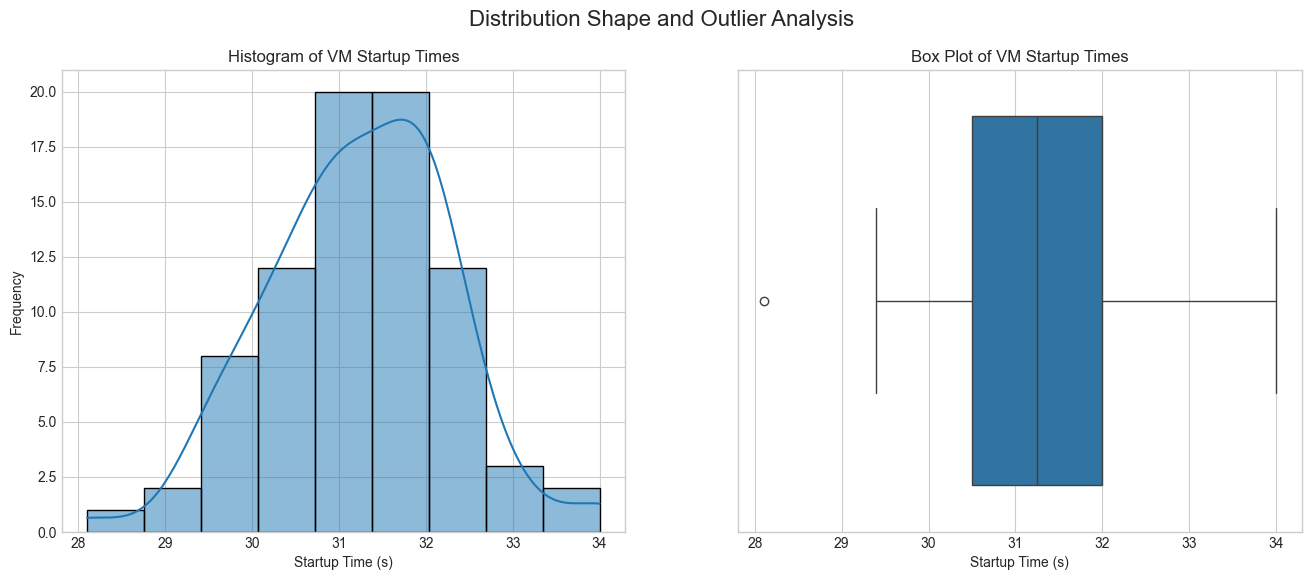

--- Outlier Detection (1.5 * IQR Rule) ---
Lower Whisker Bound: 28.2500
Upper Whisker Bound: 34.2500
Potential Outliers Found: [28.1]


In [7]:
# --- Create a figure for the plots ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution Shape and Outlier Analysis', fontsize=16)

# (d) Histogram with Kernel Density Estimate
sns.histplot(startup_times, kde=True, ax=ax1)
ax1.set_title('Histogram of VM Startup Times')
ax1.set_xlabel('Startup Time (s)')
ax1.set_ylabel('Frequency')

# (e) Box Plot and Outlier Flagging
sns.boxplot(x=startup_times, ax=ax2)
ax2.set_title('Box Plot of VM Startup Times')
ax2.set_xlabel('Startup Time (s)')

plt.show()

# --- Outlier Calculation and Reporting ---
lower_bound = q1_val - 1.5 * iqr_val
upper_bound = q3_val + 1.5 * iqr_val
outliers = startup_times[(startup_times < lower_bound) | (startup_times > upper_bound)]

print(f"--- Outlier Detection (1.5 * IQR Rule) ---")
print(f"Lower Whisker Bound: {lower_bound:.4f}")
print(f"Upper Whisker Bound: {upper_bound:.4f}")
print(f"Potential Outliers Found: {outliers}")

### Interpretation of Histogram and Box Plot

The histogram appears roughly unimodal and bell-shaped, though it's not perfectly symmetric. This visual evidence suggests that a Normal distribution might be a reasonable, if not perfect, model.

The box plot confirms the central tendency and spread. More importantly, it flags three data points as potential outliers based on the 1.5 * IQR rule: one value is unusually low (28.1). In a real-world scenario, these value would warrant further investigation.

### ECDF and Normal P-P Plot (Parts f, g)

* **ECDF Plot**: The Empirical Cumulative Distribution Function shows the proportion of data points less than or equal to a given value. It's a non-parametric way to view the distribution.
* **P-P Plot**: The Probability-Probability plot compares the empirical CDF of the data against the theoretical CDF of a Normal distribution. If the data is normally distributed, the points will fall closely along the reference line.

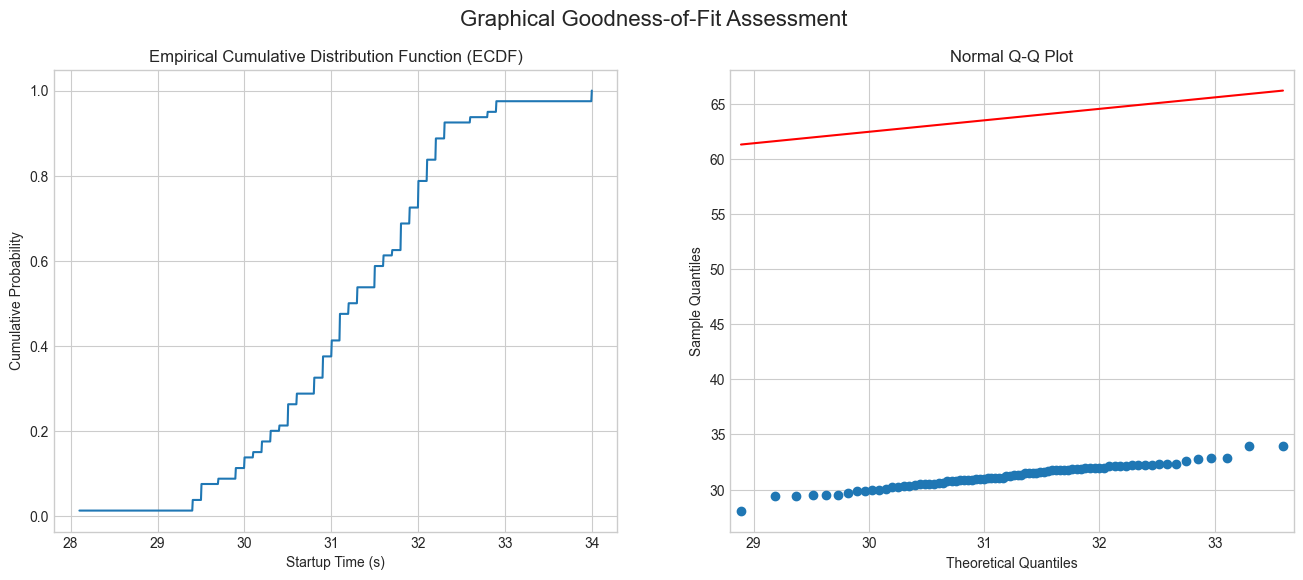

In [8]:
# --- Create a new figure for the goodness-of-fit plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Graphical Goodness-of-Fit Assessment', fontsize=16)

# (f) ECDF Plot
# We can use statsmodels to plot ECDF easily
ecdf = sm.distributions.ECDF(startup_times)
x_ecdf = np.linspace(min(startup_times), max(startup_times), num=1000)
y_ecdf = ecdf(x_ecdf)
ax1.plot(x_ecdf, y_ecdf)
ax1.set_title('Empirical Cumulative Distribution Function (ECDF)')
ax1.set_xlabel('Startup Time (s)')
ax1.set_ylabel('Cumulative Probability')

# (g) Normal P-P Plot
# We use qqplot which is technically a Q-Q plot but serves the same purpose of checking normality.
# For a P-P plot specifically, `probplot` is available but qqplot is often more readable.
sm.qqplot(startup_times, line='s', ax=ax2, dist=stats.norm, loc=mean_val, scale=std_val)
ax2.set_title('Normal Q-Q Plot') # Renamed for accuracy, as qqplot is used.
ax2.get_lines()[0].set_markerfacecolor('C0')
ax2.get_lines()[0].set_markeredgecolor('C0')
ax2.get_lines()[1].set_color('red')

plt.show()

### Interpretation of GoF Plots

The ECDF plot shows the classic "S" shape expected for a bell-shaped distribution.

The Normal Q-Q Plot is more revealing. While most points lie close to the red reference line, there are slight deviations at both the lower and upper tails. This indicates that the tails of our data's distribution are slightly different from a perfect Normal distribution, which aligns with our earlier finding of a positive excess kurtosis (heavier tails).

## Step 4: Formal Goodness-of-Fit Tests (Part h)

While visual inspection is useful, a formal hypothesis test provides a statistical basis for our conclusions. We use the Kolmogorov-Smirnov (KS) test to compare our data against two theoretical distributions. We will use a significance level of $\alpha = 0.05$.

-   **$H_0$ (Null Hypothesis)**: The sample data is drawn from the specified distribution.
-   **$H_1$ (Alternative Hypothesis)**: The sample data is NOT drawn from the specified distribution.
-   **Decision Rule**: If p-value < $\alpha$, we reject $H_0$.

### Test 1: Normality (with Lilliefors Correction)

We test if the data follows a Normal distribution. Since we are estimating the mean and standard deviation from the data itself, we must use the Lilliefors-corrected version of the KS test for accuracy.

In [9]:
alpha = 0.05

# KS test for Normal distribution (with Lilliefors correction)
lilliefors_stat, lilliefors_p_val = sm.stats.lilliefors(startup_times, dist='norm')

print("--- H0: Data is from a Normal Distribution ---")
print(f"Significance Level (alpha): {alpha}")
print(f"Lilliefors Test Statistic: {lilliefors_stat:.4f}")
print(f"P-value: {lilliefors_p_val:.4f}")

if lilliefors_p_val < alpha:
    print(f"Decision: Reject H0. The data is unlikely to be normally distributed.")
else:
    print(f"Decision: Fail to reject H0. There is not enough evidence to say the data is not normally distributed.")

--- H0: Data is from a Normal Distribution ---
Significance Level (alpha): 0.05
Lilliefors Test Statistic: 0.0809
P-value: 0.2708
Decision: Fail to reject H0. There is not enough evidence to say the data is not normally distributed.


### Test 2: Exponential Distribution

Next, we test if the data could follow an Exponential distribution. The parameter $\lambda$ is estimated as the inverse of the sample mean ($1/\overline{x}$).

In [10]:
# Estimate lambda for the exponential distribution
lambda_est = 1 / mean_val

# One-sample KS test for Exponential distribution
ks_stat_exp, ks_p_val_exp = stats.kstest(startup_times, 'expon', args=(0, 1/lambda_est))

print("\n--- H0: Data is from an Exponential Distribution ---")
print(f"Significance Level (alpha): {alpha}")
print(f"KS Test Statistic: {ks_stat_exp:.4f}")
print(f"P-value: {ks_p_val_exp:.4f}")

if ks_p_val_exp < alpha:
    print(f"Decision: Reject H0. The data is unlikely to be exponentially distributed.")
else:
    print(f"Decision: Fail to reject H0. The data could be exponentially distributed.")


--- H0: Data is from an Exponential Distribution ---
Significance Level (alpha): 0.05
KS Test Statistic: 0.5973
P-value: 0.0000
Decision: Reject H0. The data is unlikely to be exponentially distributed.


## Step 5: Overall Conclusion

The comprehensive analysis of the VM startup times reveals the following:

1.  **Central Tendency and Dispersion**: The process is quite stable, centered around a mean of ~31.2 seconds with a very low coefficient of variation (~3.4%).
2.  **Distribution Shape**: Visually, the data appears mostly symmetric and bell-shaped, though with slightly heavier tails than a perfect Normal distribution (positive excess kurtosis) and a few potential outliers.
3.  **Formal Testing**:
    * The Lilliefors test for normality yielded a p-value greater than 0.05. Therefore, we **do not have sufficient statistical evidence to reject the hypothesis that the data follows a Normal distribution**. For many practical modeling purposes, assuming normality would be a reasonable approximation.
    * The KS test for the Exponential distribution yielded a p-value near zero. We **strongly reject the hypothesis that the data is Exponentially distributed**.

In summary, a Normal distribution serves as a plausible model for the VM startup times, whereas an Exponential distribution is entirely inappropriate. Any further analysis should consider the potential impact of the identified outliers.